# Olympic Games Analysis

### Preliminaries

In [1]:
import pandas as pd

import os

import matplotlib.pyplot as plt

import numpy as np

## Datasets

The following datasets are taken for the analysis:

### Olympic Games Data

Data from the Olympic Games, for the period considered, were collected for each individual athlete in a given Olympic event (or race) and recorded in the file `athlete_events.csv`. For example, the following entry is for the first gold medal won by a Portuguese woman:

| |ID |Name |Sex |Age |Height |Weight |Team |NOC |Games |Year |Season |City |Sport |Event |Medal|
|---|---|-------|-------|-------|-------|-------|- ------|-------|-------|-------|-------|-------|--- ----|-----------|-----|
|164334 |82494 |Rosa Mara Correia dos Santos Mota |F |30 |157 |45 |Portugal |POR |1988 Summer |1988 |Summer |Seoul |Athletics |Athletics Women's Marathon |Gold|

As can be seen, various information is recorded for each individual athlete in a given Olympic event, such as name (`Name`), gender (`Sex`), age (`Age`), edition of the Olympic Games (`Games `), the Olympic event (`Event`) among others. It should be noted that, for each athlete, there is an identifier (`ID`) that is unique to that athlete and invariable - it remains for all Olympic events in which that athlete has participated, regardless of the edition (year).

Regarding Olympic events, there are individual events and team events - e.g. football and the 4x100m relay are team events. In team events, the data includes one record for each athlete on the team.

### Population

CSV file `population.csv` includes information about the population of each country for a given year.

The csv file includes ISO3 code of the country (in lower case) (`geo`), the name of the country (`name`), the year (`time`) and the population (`population`).

### Country codes

CSV file `codes.csv` includes information about the different codes used for different countries.

The csv file includes, among other, the name of the country (`Country`), ISO3 code (`ISO3`) and the national olympic code (`IOC`).


The following code loads the datasets.


In [2]:
dataFileName = os.path.join( "data", "athlete_events.csv")

dataDF = pd.read_csv(dataFileName)

print(dataDF.head(5))

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

In [3]:
codesFileName = os.path.join( "data", "codes.csv")

codesDF = pd.read_csv(codesFileName)

print(codesDF.head(5))

          Country ISO2 ISO3   ISON  IOC FIPS Plates Domain
0     Afghanistan   AF  AFG    4.0  AFG   AF    AFG    .af
1   Åland Islands   AX  ALA  248.0  NaN  NaN     AX    .ax
2         Albania   AL  ALB    8.0  ALB   AL     AL    .al
3         Algeria   DZ  DZA   12.0  ALG   AG     DZ    .dz
4  American Samoa   AS  ASM   16.0  ASA   AQ    USA    .as


In [4]:
populationFileName = os.path.join( "data", "population.csv")

populationDF = pd.read_csv(populationFileName)

print(populationDF.head(5))

   geo         name  time  Population
0  afg  Afghanistan  1800   3280000.0
1  afg  Afghanistan  1801   3280000.0
2  afg  Afghanistan  1802   3280000.0
3  afg  Afghanistan  1803   3280000.0
4  afg  Afghanistan  1804   3280000.0


For data on atheletes, there are some information missing. We can compute the number of entries missing using the following code.

**NOTE:** the missing information on Medal is expected - it just means that the athlete has won no medal in the event.

In [5]:
dataDF.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

## Part 1

In this part, I start by exploring the data available with simple queries.


### **1.a)** How many athletes have participated in Summer Olympics and how many athlete participated in Winter Olympics?



In [6]:
# Number of different people ever participated in the Olympic games

# Filter data for Summer Olympics
summer_participation = dataDF[dataDF["Season"] == "Summer"]

# Calculate the total number of athletes in Summer Olympics
# You have to look at the ID entries, because only the IDs are unique, while the Names might not be
total_summer_athletes = summer_participation["ID"].nunique()

# Filter data for Winter Olympics
winter_participation = dataDF[dataDF["Season"] == "Winter"]

# Calculate the total number of athletes in Winter Olympics
total_winter_athletes = winter_participation["ID"].nunique()

# Print the results
print("Total number of athletes in Summer Olympics: ", total_summer_athletes)
print("Total number of athletes in Winter Olympics: ", total_winter_athletes)

Total number of athletes in Summer Olympics:  116776
Total number of athletes in Winter Olympics:  18958


### **1.b)** Who are the three youngest and oldest athletes that won a Gold medal in the Olympic games?


In [7]:
gold_medal_winners = dataDF.loc[dataDF["Medal"] == "Gold"]

# three youngest Gold medal winners:
print("The three youngest gold medal winners are:")
# print(gold_medal_winners.nsmallest(3, "Age")) # --> all information about the three youngest winners
print(gold_medal_winners.nsmallest(3, "Age")[["Name", "Age"]])

print("\n-----------------------------------------\n")

# three youngest Gold medal winners:
print("The three oldest gold medal winners are:")
# print(gold_medal_winners.nlargest(3, "Age")) # --> all information about the three youngest winners
print(gold_medal_winners.nlargest(3, "Age")[["Name", "Age"]])

The three youngest gold medal winners are:
                                     Name   Age
27207                       Hans Bourquin  13.0
52010  Donna Elizabeth de Varona (-Pinto)  13.0
73581                          Fu Mingxia  13.0

-----------------------------------------

The three oldest gold medal winners are:
                        Name   Age
105199       Charles Jacobus  64.0
233390     Oscar Gomer Swahn  64.0
104003  Isaac Lazarus Israls  63.0


### 1.c) Who are the top-10 athletes that have won more Gold medals in the Olympic Games?



In [8]:
gold_medal_winners.groupby("Name")["Medal"].count().nlargest(10)

Name
Michael Fred Phelps, II                            23
Raymond Clarence "Ray" Ewry                        10
Frederick Carlton "Carl" Lewis                      9
Larysa Semenivna Latynina (Diriy-)                  9
Mark Andrew Spitz                                   9
Paavo Johannes Nurmi                                9
Birgit Fischer-Schmidt                              8
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)     8
Matthew Nicholas "Matt" Biondi                      8
Ole Einar Bjrndalen                                 8
Name: Medal, dtype: int64

### 1.d) For Summer Olympics, after 1950, who are the athletes that have won more medals in each edition?

In [9]:
medal_winners = dataDF[(dataDF["Medal"].isin(["Gold", "Silver", "Bronze"]))]

# Here, the input "Year" and "Games" can both be used, leading to the same output, as we only look at summer games. 
# For the sake of a better looking output, however, I use the "Year".
summer_after_1950 = medal_winners[(medal_winners["Year"] > 1950)\
                                  & (medal_winners["Season"] == "Summer")]

# Group data by Year and Athlete and count medals
medal_counts_1d = summer_after_1950.groupby(["Year", "Name"])\
                                    .size().reset_index(name="MedalCount")

# Find the top athlete for each year
top_athletes = medal_counts_1d.loc[medal_counts_1d.groupby("Year")["MedalCount"].idxmax()]
print(top_athletes)

       Year                                Name  MedalCount
502    1952      Mariya Kindrativna Horokhovska           7
1210   1956  Larysa Semenivna Latynina (Diriy-)           6
1661   1960         Borys Anfiyanovych Shakhlin           7
2859   1964  Larysa Semenivna Latynina (Diriy-)           6
3860   1968         Mikhail Yakovlevich Voronin           7
4811   1972                   Mark Andrew Spitz           7
6040   1976        Nikolay Yefimovich Andrianov           7
6487   1980     Aleksandr Nikolayevich Dityatin           8
8417   1984                             Li Ning           6
9853   1988      Matthew Nicholas "Matt" Biondi           7
11869  1992       Vitaly Venediktovich Shcherbo           6
12006  1996             Aleksey Yuryevich Nemov           6
13714  2000             Aleksey Yuryevich Nemov           6
16614  2004             Michael Fred Phelps, II           8
18468  2008             Michael Fred Phelps, II           8
20346  2012             Michael Fred Phe

### 1.e) Computing the number of gold, silver and bronze medals each athlete has won.

In [10]:
# Group data by Name and Medal and count medals
medal_counts_1e = dataDF.groupby(["ID", "Name", "Medal"])\
                        .size().reset_index(name="MedalCount")

# Pivot the table to get medals as columns

medal_counts_pivot_1e = medal_counts_1e\
                        .pivot(index=["ID", "Name"], columns="Medal", values="MedalCount")\
                        .fillna(0)
medal_counts_pivot_1e = medal_counts_pivot_1e[["Bronze", "Silver", "Gold"]]
print(medal_counts_pivot_1e)

Medal                                       Bronze  Silver  Gold
ID     Name                                                     
4      Edgar Lindenau Aabye                    0.0     0.0   1.0
15     Arvo Ossian Aaltonen                    2.0     0.0   0.0
16     Juhamatti Tapio Aaltonen                1.0     0.0   0.0
17     Paavo Johannes Aaltonen                 2.0     0.0   3.0
20     Kjetil Andr Aamodt                      2.0     2.0   4.0
...                                            ...     ...   ...
135544 Krzysztof Zwoliski                      0.0     1.0   0.0
135545 Henk Jan Zwolle                         1.0     0.0   1.0
135553 Galina Ivanovna Zybina (-Fyodorova)     1.0     1.0   1.0
135554 Bogusaw Zych                            1.0     0.0   0.0
135563 Olesya Nikolayevna Zykina               1.0     1.0   0.0

[28251 rows x 3 columns]


### 1.f) Printing the table of medals for each country for the gameas of 2016.

**NOTE:** for collective events (e.g. football, 4*100 meters), I count only one medal for a given event.


In [11]:
print(dataDF["Team"].nunique())
teams = dataDF["Team"].unique()
teams.sort()
print(teams[:5])

"""
Looking at the dataset, it is clear that grouping by the Teamname might be nonsense, as some teamnames are e.g., 
"30. Februar" or "A North American Team". A better way to approach this task is grouping by the 
National Olympic Commitee codes (NOC).
"""
print("\n--------------------------\n")

# Filtering the dataset
games_2016 = medal_winners[medal_winners["Year"] == 2016]

# Identify and exclude duplicate medals for collective events
# If there is a duplicate with the same NOC, Event, and Medal, this is definitley a team event
unique_events_2016 = games_2016.drop_duplicates(subset=["NOC", "Event", "Medal"])

medal_counts_1f = unique_events_2016.groupby(["NOC", "Medal"]).size()\
                                    .reset_index(name="MedalCount")

# Pivot the table to get medals as columns
medal_counts_pivot_1f = medal_counts_1f\
                            .pivot(index="NOC", columns="Medal", values="MedalCount")\
                            .fillna(0)
medal_counts_pivot_1f = medal_counts_pivot_1f[["Bronze", "Silver", "Gold"]]
print(medal_counts_pivot_1f)

1184
['30. Februar' 'A North American Team' 'Acipactli' 'Acturus' 'Afghanistan']

--------------------------

Medal  Bronze  Silver  Gold
NOC                        
ALG       0.0     2.0   0.0
ARG       0.0     1.0   3.0
ARM       0.0     3.0   1.0
AUS      10.0    11.0   8.0
AUT       1.0     0.0   0.0
..        ...     ...   ...
UKR       4.0     5.0   2.0
USA      38.0    37.0  46.0
UZB       7.0     2.0   4.0
VEN       2.0     1.0   0.0
VIE       0.0     1.0   1.0

[86 rows x 3 columns]


**Rationale:** In order to filter out every collective event it is best to drop all duplicates, where the country, the event and the medal are the same. If e.g. a silver medal in one event was won 11 times by people from the same nation, it is certain, that that was a team event with a teamsize of 11. As shown above, using the column "Team" for filtering the country is nonsense, which is why I used the National Olympic Commitee code (NOC) for my computations.

## Part 2

It is normal that smaller countries conquer less medals, as their population is smaller.
In this question, we try to put the number of medals into prespective, considering the population of countries.




### 2.a) Printing the table of medals for each country per million inhabitants for the games of 2016.



**Approach:** In order to solve this question, I first have to join the three DataFrames. This can be done by firstly merging
the dataFrames "codes" and "population" using the ISO3 code. Before merging, however, I need to convert the
ISO3 code of one of the DataFrames to the format of the ISO3 code of the other DataFrame, as "codes" stores this
code in uppercase, while it is lowercase in "population". Further, when joining these two DataFrames I should 
only consider the population data of 2016, as everything else is irrelevant for this task. Keeping the DataFrames
as small as possible before joining is beneficial for the performance (running time).

When then joining the result of the first join with the DataFrame "athlete_events" in order to obtain a DataFrame
with all the information, the information of the "athlete_events" DataFrame is leading , i.e., if there is 
information in population and/or codes, that cannot be matched with information with data, this information is 
irrelevant, implying that a left join is the go-to. Further, we only need the information that is in "medal_counts" + the NOC. Thus, we first redefine "medal_counts" and then we join all the dataFrames.

In [12]:
# Join the dataFrames "games_2016" and "population". 

# Convert the ISO3 code of the DF "population" to uppercase
populationDF["geo_upper"] = populationDF["geo"].str.upper()

# Joining the codes and population, while only considering the population in 2016. 
pop_codes = populationDF[populationDF["time"] == 2016]\
            .join(codesDF.set_index("ISO3"),on="geo_upper")

# Recomputing medal counts with the information from "NOC" and "Medal"
medal_counts_2a = games_2016.groupby(["NOC", "Medal"]).size().reset_index(name="MedalCount")

# Final join: Left join with medal_counts_2a being the leading DataFrame
all_merged_2016 = medal_counts_2a.join(pop_codes.set_index("IOC"), on = "NOC", how = "left")

# Calculating the number of medals won per million inhabitants
all_merged_2016["MedalCount/population"] = 1000000 * all_merged_2016["MedalCount"] / all_merged_2016["Population"]

# Pivot the table to get medals as columns
all_merged_2016_pivot = all_merged_2016.pivot(index="NOC", columns="Medal",\
                                              values="MedalCount/population").fillna(0)
all_merged_2016_pivot = all_merged_2016_pivot[["Bronze", "Silver", "Gold"]]
print(all_merged_2016_pivot)

Medal    Bronze    Silver      Gold
NOC                                
ALG    0.000000  0.049579  0.000000
ARG    0.000000  0.022900  0.480899
ARM    0.000000  1.046815  0.348938
AUS    1.033241  1.405208  0.950582
AUT    0.228925  0.000000  0.000000
..          ...       ...       ...
UKR    0.111524  0.178438  0.044609
USA    0.216986  0.165032  0.424803
UZB    0.222550  0.063586  0.127172
VEN    0.065059  0.032529  0.000000
VIE    0.000000  0.010738  0.010738

[86 rows x 3 columns]


**Rationale:** Here, I disregard the fact that one discipline might lead to multiple medals (e.g., football --> see question 1f), 
as this does not make sense when looking at the numbers per million inhabitants. Assume that you have a country with 11 million inhabitants and you have 11 people each winning a medal in a team-event (e.g. football). Then, 11 out of 11 million people own a medal, leading to 1 medal per million inhabitants. I applied this logic to this question. 

## Part 3

This third part focuses on processing the information on a time series for plotting it.


### 3.a) Displaying the information about the number of athletes and medals wons by a country in the Olympic games over the years.

Chosen Team: United States. NOC = USA


    Year  Participants  MedalCount
0   1896            14          20
1   1900            75          63
2   1904           524         394
3   1906            38          24
4   1908           122          65
5   1912           174         107
6   1920           288         194
7   1924           323         194
8   1928           304         102
9   1932           538         223
10  1936           414         112
11  1948           369         168
12  1952           352         164
13  1956           371         149
14  1960           371         152
15  1964           436         177
16  1968           453         173
17  1972           503         195
18  1976           502         175
19  1980           101          30
20  1984           628         361
21  1988           644         214
22  1992           693         238
23  1994           148          19
24  1996           648         259
25  1998           186          34
26  2000           586         242
27  2002           2

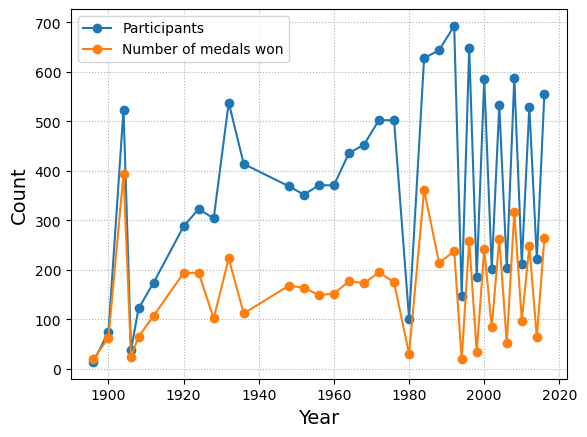

In [13]:
# Computing the number of medals won by US-participants in each year
medal_counts_3a = medal_winners[medal_winners["NOC"] == "USA"]\
                    .groupby(["Year"])\
                    .size()\
                    .reset_index(name="MedalCount")

# Computing the number of participants from the US
participants = dataDF[dataDF["NOC"] == "USA"].groupby("Year")["ID"]\
                                            .nunique().reset_index(name="Participants")

# Joining the two DataFrames
participants_and_medals = participants.join(medal_counts_3a.set_index("Year"), on = "Year")
print(participants_and_medals)

# Defining x and y variables
y = participants_and_medals["Year"]
x_p = participants_and_medals["Participants"]
x_m = participants_and_medals["MedalCount"]

# Plotting participants
plt.plot(y, x_p, "-o", label="Participants")

# Plotting medals
plt.plot(y, x_m, "-o", label="Number of medals won")

# Some features for the plot
plt.xlabel("Year", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(True, linestyle=":")

# Adding a legend
plt.legend()

# Show the plot
plt.show()


**Rationale:** I first calculated the number of medals and number of participants using the data from the USA. For the number of medals, I again did not give team-events a special treatment, just as they might lead to multiple medals. Assume you send 11 athletes to the olympic games and they compete as a team in the discipline football. If they win a medal, each and everyone receives one, leading to a 100% quota of medals won per athletes attending. This quota would go down (wrongly!) to 1/11 if I wouldn't disregard this fact.

In order to plot the number of participants and the number of medals, I first created to seperate dataFrames, one including the year and the number of participants the USA sent to the olympic games during this year, and one including the year and the number of medals the USA won in the olympic games during that particular year. After having these two seperate dataFrames, I merged them using the "year"-entries as a key. With this final dataFrame, plotting was straight-forward.

Regarding the presentation of the data, I opted for a line plot, even though it may not seem like the most intuitive choice. The reason behind this decision was to provide a clearer view of data fluctuations over time, as solely relying on a scatter plot can be confusing. However, it's essential to keep in mind that there's no substantial meaning associated with points on the line that aren't marked as prominent dots. To better distinguish between genuine data points and those included for visual clarity, I used the "-o" format.

Looking at the lines you can see that there is a lot of noise starting around the beginning of the 1990s. This noise can be easily explained by the introduction of the olympic winter games in seperate years. Before 1994 the winter and summer versions of the olympic games took place in the same year. After 1994, however, the winter and summer games take turns every two years, explaining the aforementioned noise. 
Another factor adding to the noise is the difference between the Summer and Winter Games. The Summer Games tend to have more participants and more events. So, that imbalance adds another layer of variability to the mix, making the whole picture a bit more complex.

### 3.b) Displaying trends of athletes and medals for a given country.

There might be some editions that are an outlier in the number of athletes or medals a given country wins. Instead of plotting the actual values, I will plot trend lines.



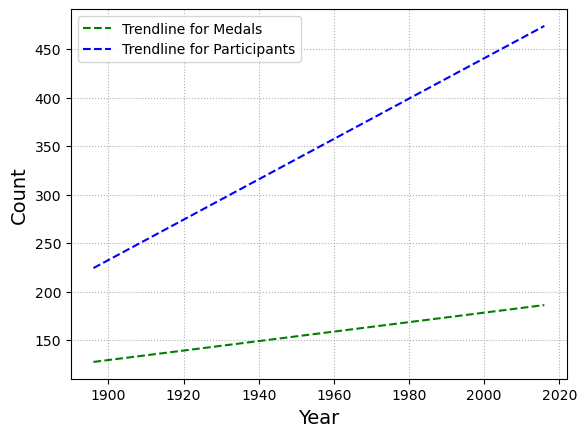

In [14]:
# Plotting the pure trendline using numpy

# Fit a linear regression model for participants using numpy
coefficients_p = np.polyfit(y, x_p, 1)
slope_p, intercept_p = coefficients_p
trendline_p = slope_p * y + intercept_p

# Fit a linear regression model for medals using numpy
coefficients_m = np.polyfit(y, x_m, 1)
slope_m, intercept_m = coefficients_m
trendline_m = slope_m * y + intercept_m

# Plotting participants
##plt.plot(y, x_p, '-o', label="Participants")

# Plotting medals
##plt.plot(y, x_m, '-o', label="Number of medals won")

# Plotting the trendlines
plt.plot(y, trendline_m, color='green', linestyle='--', label='Trendline for Medals')
plt.plot(y, trendline_p, color='blue', linestyle='--', label='Trendline for Participants')

# Some features for the plot
plt.xlabel("Year", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(True, linestyle=":")

# Adding a legend
plt.legend()

# Show the plot
plt.show()

**Rationale 1:** In order to plot pure trendlines it might be smart to use the np.polyfit function from the numpy library, as this finds "the least number of squares in the function that fits in a polynomial equation [Quote: https://www.scaler.com/topics/numpy-polyfit/]. These lines, however, are difficult to interpret, as they do not account for the fluctuation caused by the alternation of summer and winter games. They just give a very broad overview about the trend for both lines. The interpretation of those trendlines would then be that there is positive trend in both, the number of participants attending and the number of medals won in olympic games, while the latter shows a less extreme, yet significant trend.

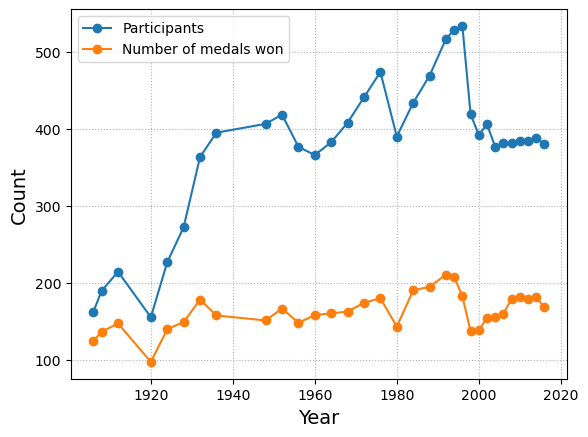

In [15]:
# Another solution: moving average
movingAverage_range = 4

x_p_MA = participants_and_medals["Participants"]\
                .rolling(movingAverage_range, center = False).mean()
x_m_MA = participants_and_medals["MedalCount"]\
                .rolling(movingAverage_range, center = False).mean()

# Plotting participants
plt.plot(y, x_p_MA, '-o', label="Participants")

# Plotting medals
plt.plot(y, x_m_MA, '-o', label="Number of medals won")

# Some features for the plot
plt.xlabel("Year", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(True, linestyle=":")

# Adding a legend
plt.legend()

# Show the plot
plt.show()

**Rationale:** In order to account for the alternation between the summer and winter games, it might be wise to also look at moving averages. Looking at the moving averages, however, does not result in such a pure trendline as shown above. 

As I want to attribute equal weight to each and every event of the olympic games it does not make sense to look at normal weighted moving average or special weighted moving averages, such as exponential, making me choose the simple moving average. To show the trends up until now it is better not to go for the centered simple moving average either. Thus, I decided to go with the simple, non-centered moving average.

To then include fact of the summer and winter games taking turn in my logic, the moving average should have a length of at least two (one summer and one winter event). To make it more of a trendline, I decided to use two summer and two winter events, leading to a moving average of length 4. 

**Interpretation:** Looking at the moving average graph, we can see that using the moving average decreased the noise in the graph. The interpretation of this graph is then similar to the interpretation of the trendlines shown before. 

Nevertheless, one should bear in mind that I chose the moving average to be of length 4 because of the alternation between summer and winter events. As the summer and winter games only take turns from 1994 onwards, this length might not be optimal for the time before 1994. Yet, I think that length 4 is not too big, thus still leading to moderate results even in the period before 1994. 

## Part 4

This fourth part focuses on understanding the relations between elements.


### 4.a) Is there any relation between the medals won by different countries?

Study the relation in the evolution of medals won by different countries over the years.

Selected Countries: 
- China (CHN), 
- United States (USA), 
- Great Britian (GBR), 
- and Germany (= East Germany, West Germany, Germany --> GDR + FRG + GER)

In [16]:
# Medals won by China over the years
China = medal_winners[medal_winners["NOC"] == "CHN"].groupby(["Year"]).size()\
                    .reset_index(name="MedalCount_CHN")

# Medals won by USA over the years
UnitedStates = medal_winners[medal_winners["NOC"] == "USA"].groupby(["Year"]).size()\
                    .reset_index(name="MedalCount_USA")

# Medals won by GBR over the years
GreatBritian = medal_winners[medal_winners["NOC"] == "GBR"].groupby(["Year"]).size()\
                    .reset_index(name="MedalCount_GBR")

# Medals won by Germany (East + West + "current") over the years
Germany = medal_winners[(medal_winners["NOC"] == "GDR") |\
                                 (medal_winners["NOC"] == "FRG") |\
                                 (medal_winners["NOC"] == "GER")]\
                                .groupby(["Year"]).size()\
                                .reset_index(name="MedalCount_GER")

Countries = [China, UnitedStates, GreatBritian, Germany]

# Merging all the DataFrames using the column "Year". Once this is done, I drop the column "Year"
temp = China
for country in Countries[1:]:
    temp = temp.join(country.set_index("Year"), on = "Year", how = "outer")
all_countries = temp.sort_values(by = "Year").drop("Year", axis = 1)\
                    .reset_index(drop = True).fillna(0)

# Calculate the correlation matrix
correlation_matrix = all_countries.corr()
print(correlation_matrix)

                MedalCount_CHN  MedalCount_USA  MedalCount_GBR  MedalCount_GER
MedalCount_CHN        1.000000        0.590552        0.124251        0.219071
MedalCount_USA        0.590552        1.000000        0.031288        0.221917
MedalCount_GBR        0.124251        0.031288        1.000000       -0.112771
MedalCount_GER        0.219071        0.221917       -0.112771        1.000000


**Present an interpretation of the results here:** 

Gerneral interpretation scheme: 
- abs(correlation) in [0, 0.2) --> very weakly correlated
- abs(correlation) in [0.2, 0.4) --> weakly correlated
- abs(correlation) in [0.4, 0.6) --> moderately correlated
- abs(correlation) in [0.6, 0.8) --> strongly correlated
- abs(correlation) in [0.8, 0.1] --> very strongly correlated

Correlation between a series and itself is always equal to 1. Thus, those entries do not need any additional interpretation.

Important note: Correlation *not equal* causation!

/-----------------------------------------------------------------------------------------------------------------/

Correlation between:
- China and USA:
    The medal winning correlation is approx. 0.59 meaning that they are *moderately* correlated.
    This implies that if China wins more medals, there is a *moderate* tendency, that the USA also win more
    medals, and vice versa.
- China and Great Britian: 
    The medal winning correlation is approx. 0.12 meaning that they are *very weakly* correlated.
    This implies that if China wins more medals, there is a *very weak* tendency, that Great Britian also wins 
    more medals, and vice versa.
- China and Germany: 
    The medal winning correlation is approx. 0.22 meaning that they are *weakly* correlated.
    This implies that if China wins more medals, there is a *weak* tendency, that Germany also wins more medals,
    and vice versa.
- USA and Great Britian:
    The medal winning correlation is approx. 0.31 meaning that they are *weakly* correlated.
    This implies that if the USA win more medals, there is a *weak* tendency, that Great Britian also wins more
    medals, and vice versa.
- USA and Germany:
    The medal winning correlation is approx. 0.22 meaning that they are *weakly* correlated.
    This implies that if the USA win more medals, there is a *weak* tendency, that Germany also wins more
    medals, and vice versa.   
- Great Britian and Germany:
    The medal winning correlation is approx. -0.11 meaning that they are *very weakly* correlated.
    This implies that if Great Britian wins more medals, there is a *very weak* tendency, that Germany wins less
    medals, and vice versa.  


### 4.b) Extended analysis

As medals are competitive, one could expect that the fact that some countries starts winning more medals leads other countries to win less medals. But this would only be true if the total number of medals would have remained constant.


**Analysis proposed:**
As the number of medals did not remain (approximately) constant over time, it makes sense to look at the medal 
winning ratio, meaning, how many medals out of the total amount of medals did country XY win. 


**Rationale of implementation:**
For each year I need to compute the total amount of medals available, *total_medals*. Having this number, I can 
compute the *medal_ratio* by dividing the number of medals won, *MedalCount_"NOC"*, by *total_medals*.
This, I should do for each of the four countries (China, USA, Great Britian, and Germany) and store the outcomes in a seperate DataFrame *ratiosDF*. With this new DataFrame, I can now compute the correlation matrix once again. 

In [17]:
# Calculating the total number of medals for each year
total = medal_winners.groupby(["Year"]).size().reset_index(name="total_medals")

# Calulating the ratios
ratiosDF = pd.DataFrame()
ratiosDF["CHN"] = all_countries["MedalCount_CHN"] / total["total_medals"]
ratiosDF["USA"] = all_countries["MedalCount_USA"] / total["total_medals"]
ratiosDF["GBR"] = all_countries["MedalCount_GBR"] / total["total_medals"]
ratiosDF["GER"] = all_countries["MedalCount_GER"] / total["total_medals"]

# Calculate the correlation matrix
correlation_matrix_ratios = ratiosDF.corr()
print(correlation_matrix_ratios)

          CHN       USA       GBR       GER
CHN  1.000000 -0.080743 -0.232719 -0.113920
USA -0.080743  1.000000 -0.169772 -0.248230
GBR -0.232719 -0.169772  1.000000 -0.303274
GER -0.113920 -0.248230 -0.303274  1.000000


**Rationale and comments:**

Gerneral interpretation scheme: 
- abs(correlation) in [0, 0.2) --> very weakly correlated
- abs(correlation) in [0.2, 0.4) --> weakly correlated
- abs(correlation) in [0.4, 0.6) --> moderately correlated
- abs(correlation) in [0.6, 0.8) --> strongly correlated
- abs(correlation) in [0.8, 0.1] --> very strongly correlated

Correlation between a series and itself is always equal to 1. Thus, those entries do not need any additional interpretation.

Important note: Correlation *not equal* causation!

/-----------------------------------------------------------------------------------------------------------------/

Correlation between:
- China and USA:
    The medal winning correlation is approx. - 0.08 meaning that they are *very weakly* correlated.
    This implies that if China wins more medals, there is a *very weak* tendency, that the USA win less
    medals, and vice versa.
- China and Great Britian: 
    The medal winning correlation is approx. -0.23 meaning that they are *weakly* correlated.
    This implies that if China wins more medals, there is a *weak* tendency, that Great Britian wins less
    medals, and vice versa.
- China and Germany: 
    The medal winning correlation is approx. -0.11 meaning that they are *very weakly* correlated.
    This implies that if China wins more medals, there is a *very weak* tendency, that Germany wins less medals,
    and vice versa.
- USA and Great Britian:
    The medal winning correlation is approx. -0.17 meaning that they are *very weakly* correlated.
    This implies that if the USA win more medals, there is a *very weak* tendency, that Great Britian wins
    less medals, and vice versa.
- USA and Germany:
    The medal winning correlation is approx. -0.25 meaning that they are *weakly* correlated.
    This implies that if the USA win more medals, there is a *weak* tendency, that Germany wins less
    medals, and vice versa.   
- Great Britian and Germany:
    The medal winning correlation is approx. -0.30 meaning that they are *weakly* correlated.
    This implies that if Great Britian wins more medals, there is a *weak* tendency, that Germany wins less
    medals, and vice versa. 

## Part 5

This part focuses on implementation using Spark SQL.

In [18]:
# 1 - install needed software

!apt-get install openjdk-17-jdk-headless
!pip install pyspark

# 2 - download the data file (this can also be done by uploading the data file in colab)

!pip install gdown
!gdown 'https://drive.google.com/uc?id=1FXFeLvuT5tN0S-7ay5T7sFAMv9BjwO_H'

# 3 - loading the CSV file

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *

spark = SparkSession.builder \
.master("local") \
.appName("Simple test") \
.config("spark.sql.execution.arrow.pyspark.enabled", "true") \
.getOrCreate()

atFilename = "athlete_events.csv"

# Read a CSV file into a DataFrame
df = spark.read.option("header", True).option("inferSchema",True).csv(atFilename)

/bin/bash: apt-get: command not found
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1FXFeLvuT5tN0S-7ay5T7sFAMv9BjwO_H 



Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/09/29 17:07:27 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [19]:
# Starting a Spark-session
spark = SparkSession.builder \
    .master("local") \
    .appName("Simple test") \
    .config("spark.sql.execution.arrow.pyspark.enabled", "true") \
    .getOrCreate()

# Read the CSV file into a DataFrame
athletesDF = spark.read.option("header", True).option("inferSchema", True).csv(dataFileName)

# Register the DataFrame as a SQL table
athletesDF.createOrReplaceTempView("athletes")

### 5.a) Reimplementing question 1.e in Spark SQL.


In [20]:
# Pivot the data to count medals for each athlete
medal_count_spark_5a = spark.sql("""
                    SELECT Name, ID, 
                        count(CASE WHEN Medal = "Bronze" THEN 1 ELSE NULL END) as Bronze,
                        count(CASE WHEN Medal = "Silver" THEN 1 ELSE NULL END) as Silver,
                        count(CASE WHEN Medal = "Gold" THEN 1 ELSE NULL END) as Gold
                    FROM athletes
                    GROUP BY Name, ID
                                """)
medal_count_spark_5a.show()

+--------------------+----+------+------+----+
|                Name|  ID|Bronze|Silver|Gold|
+--------------------+----+------+------+----+
|   Mohamed Aberhoune| 421|     0|     0|   0|
|    Jos Filipe Abreu| 566|     0|     0|   0|
|Karem Faride Acha...| 660|     0|     0|   0|
|    Alfred Achermann| 670|     0|     1|   0|
|Alberto Enrique A...| 708|     0|     0|   0|
|      Hanns Aderhold| 930|     0|     0|   0|
|Kamal Bahadur Adh...| 939|     0|     0|   0|
|     Adolf Aebersold|1042|     0|     0|   0|
| Kevin Joseph Ahearn|1322|     0|     1|   0|
|Joan Winnifred Ai...|1505|     0|     0|   0|
|Anastasiya Sergey...|1731|     0|     0|   0|
|          Bekir Aksu|1737|     0|     0|   0|
|Khamis Al-Owairan...|1868|     0|     0|   0|
|Saleh Khalifa Al-...|1877|     0|     0|   0|
|     Hamad Al-Tayyar|2183|     0|     0|   0|
|"Danielle Remilek...|2226|     0|     0|   0|
|Ricardo Aldabe Mo...|2415|     0|     0|   0|
|"Josip ""Jozo"" A...|2454|     0|     0|   0|
|Ahmed Khalaf

### 5.b) Reimplementing question 1.d in Spark SQL.


In [21]:
# Calculate the total medals count for each athlete in each year for Summer seasons after 1950
best_athletes = spark.sql(""" 
            WITH MedalsCount AS (
                SELECT Year, ID, Name, 
                    count(CASE WHEN Medal IN ("Bronze", "Silver", "Gold") THEN 1 
                                ELSE NULL END) AS MedalsTotal
                FROM athletes
                WHERE Year > 1950 AND Season = "Summer"
                GROUP BY Year, ID, Name
            )
            SELECT Year, Name, MedalsTotal FROM 
                (
                SELECT *, RANK(MedalsTotal) 
                OVER ( PARTITION BY Year ORDER BY MedalsTotal DESC, ID ) AS rank
                FROM MedalsCount
                )
                WHERE rank = 1""")

# Display the top athletes for each year
best_athletes.show()

+----+--------------------+-----------+
|Year|                Name|MedalsTotal|
+----+--------------------+-----------+
|1952|Mariya Kindrativn...|          7|
|1956|gnes Keleti-Srkny...|          6|
|1960|Borys Anfiyanovyc...|          7|
|1964|Larysa Semenivna ...|          6|
|1968|Mikhail Yakovlevi...|          7|
|1972|   Mark Andrew Spitz|          7|
|1976|Nikolay Yefimovic...|          7|
|1980|Aleksandr Nikolay...|          8|
|1984|             Li Ning|          6|
|1988|"Matthew Nicholas...|          7|
|1992|Vitaly Venediktov...|          6|
|1996|Aleksey Yuryevich...|          6|
|2000|Aleksey Yuryevich...|          6|
|2004|Michael Fred Phel...|          8|
|2008|Michael Fred Phel...|          8|
|2012|Michael Fred Phel...|          6|
|2016|Michael Fred Phel...|          6|
+----+--------------------+-----------+



23/09/29 17:48:21 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 841012 ms exceeds timeout 120000 ms
23/09/29 17:48:21 WARN SparkContext: Killing executors is not supported by current scheduler.
23/09/29 17:48:23 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.B

23/09/29 17:48:33 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:48:43 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:48:53 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:49:03 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:49:23 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2088)
	at org.apache.spark.Heartbeater$$anon$1.run(Heartbeater.scala:46)
	at java.base/j

23/09/29 17:49:33 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2088)
	at org.apache.spark.Heartbeater$$anon$1.run(Heartbeater.scala:46)
	at java.base/j

23/09/29 17:49:43 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:49:53 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:50:03 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:50:13 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:50:23 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:50:33 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:50:43 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:50:53 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:51:03 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:51:23 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2088)
	at org.apache.spark.Heartbeater$$anon$1.run(Heartbeater.scala:46)
	at java.base/j

23/09/29 17:51:33 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:51:43 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2088)
	at org.apache.spark.Heartbeater$$anon$1.run(Heartbeater.scala:46)
	at java.base/j

23/09/29 17:51:53 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:52:03 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:52:13 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:52:33 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:52:43 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:52:53 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:53:03 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:53:13 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:53:23 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:53:43 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2088)
	at org.apache.spark.Heartbeater$$anon$1.run(Heartbeater.scala:46)
	at java.base/j

23/09/29 17:53:53 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:54:03 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:54:13 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:54:23 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:54:33 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:54:43 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:54:53 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:55:03 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:55:13 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:55:23 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:55:33 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:55:43 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:55:53 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:56:03 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:56:13 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:56:23 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:56:33 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:56:43 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:56:53 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:57:03 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2088)
	at org.apache.spark.Heartbeater$$anon$1.run(Heartbeater.scala:46)
	at java.base/j

23/09/29 17:57:13 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2088)
	at org.apache.spark.Heartbeater$$anon$1.run(Heartbeater.scala:46)
	at java.base/j

23/09/29 17:57:23 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:57:33 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:57:43 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:57:53 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:58:03 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/09/29 17:58:13 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar